In [1]:
%matplotlib inline
 
import sys
import matplotlib.cbook as cbook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import random

sys.path.append('../src/')
from functions import from_tsv_to_list

In [2]:
# train
in_train = from_tsv_to_list('../../news-navigator/train/in.tsv')
expected_train = from_tsv_to_list('../../news-navigator/train/out.tsv', skip_empty_lines=False)

# val
in_val = from_tsv_to_list('../../news-navigator/dev-0/in.tsv')
expected_val = from_tsv_to_list('../../news-navigator/dev-0/out.tsv', skip_empty_lines=False)

# test
in_test = from_tsv_to_list('../../news-navigator/test-A/in.tsv')
expected_list = from_tsv_to_list('../../news-navigator/test-A/out.tsv', skip_empty_lines=False)

path_to_photos = '/Users/alexdrozdz/Desktop/Studia/00. Seminarium magisterskie/scraped_photos_final/'

In [33]:
def show_random_img_with_all_annotations(in_list, expected_list, path_to_photos, matplotlib_colours_dict, pages=5):
    for page in range(pages):
        random_img = random.randint(0,len(in_list)) 
        file_name = in_list[random_img]
        print(file_name)

        with cbook.get_sample_data(path_to_photos + file_name) as image_file:
            image = plt.imread(image_file)

        fig, ax = plt.subplots(figsize=(15, 10))
        ax.imshow(image, cmap='gray')

        if expected_list[random_img] != '':
            annotations = expected_list[random_img].split(' ')
            for i in range(len(annotations)):
                annotation = annotations[i].split(':')
                bbox = annotation[1].split(',')
                score = annotation[2]
                x0, y0 = int(bbox[0]), int(bbox[1])
                x1, y1 = int(bbox[2]), int(bbox[3])
                width, height = x1-x0, y1-y0
                cat_name = f'{annotation[0]} {round(score*100,2)}%'
                rect = matplotlib.patches.Rectangle(
                    (x0, y0), 
                    width, 
                    height, 
                    linewidth=1, 
                    edgecolor=matplotlib_colours_dict[cat_name], 
                    facecolor='none'
                )
                ax.add_patch(rect)           
                ax.text(
                    x0, 
                    y0, 
                    cat_name, 
                    fontsize=8,
                    backgroundcolor='black',
                    color=matplotlib_colours_dict[cat_name]
                )
                
        plt.show()

In [34]:
colors_dict = {
    'photograph': 'lime',
    'illustration': 'orangered', 
    'map': 'yellow', 
    'cartoon': 'deepskyblue', 
    'editorial_cartoon': 'violet', 
    'headline': 'cyan', 
    'advertisement': 'deeppink'
    }

843.jpg


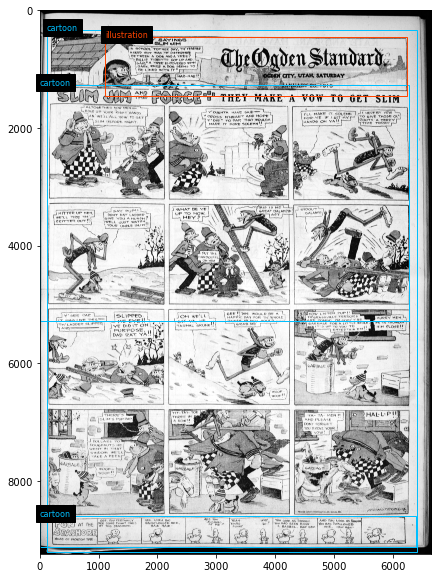

2557.jpg


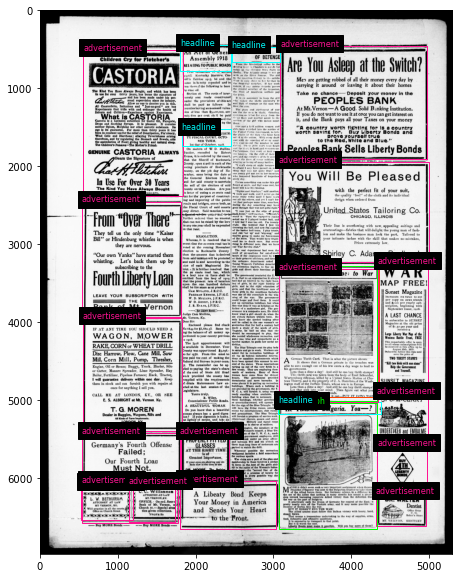

212.jpg


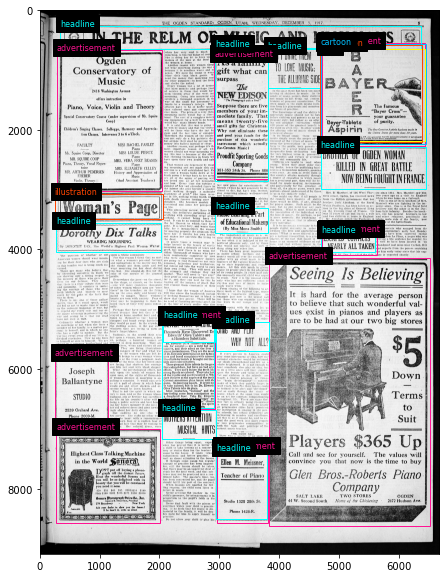

595.jpg


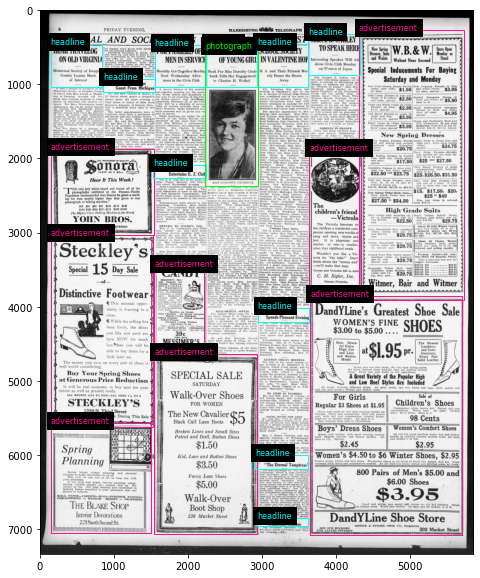

2111.jpg


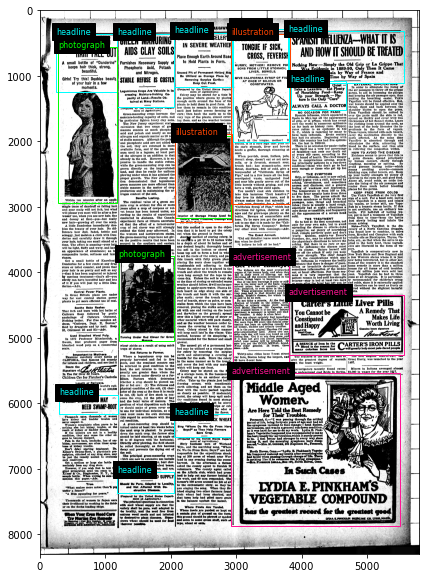

In [35]:
# some random images with annotations
show_random_img_with_all_annotations(
    in_test,
    expected_list,
    path_to_photos,
    colors_dict,
    pages=5
)